<a href="https://colab.research.google.com/github/tocom242242/QLearning_in_GridWorld/blob/master/nn_tf2/mnist_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import mnist
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation
import matplotlib.pyplot as plt

In [2]:
# mnistのデータの取得
(x_train, y_train), (x_test, y_test) = mnist.load_data()

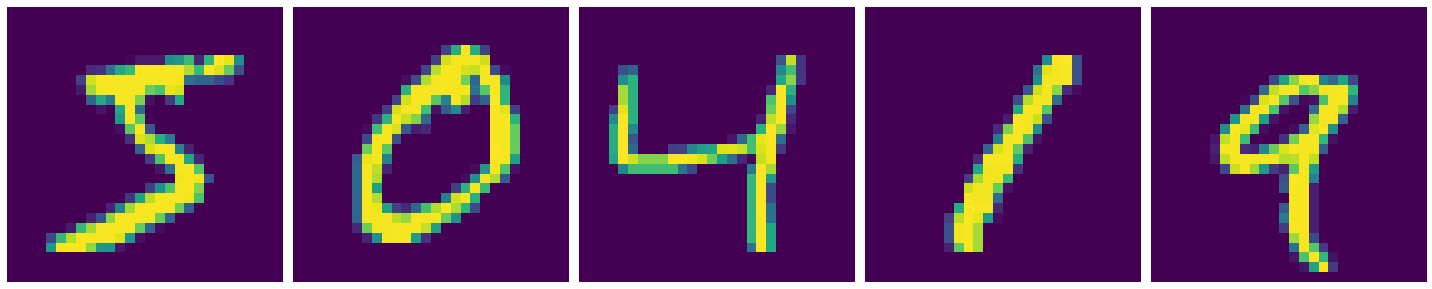

In [3]:
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plot_images(x_train[0:5])

In [4]:
# 二次元配列から一次元に変換
x_train = np.array(x_train).reshape(len(x_train), 784)  
x_test = np.array(x_test).reshape(len(x_test), 784)
x_train = np.array(x_train).astype("float32")
x_test = np.array(x_test).astype("float32")

# 0〜1に正規化
x_train /= 255
x_test /= 255
y_train = np.array(y_train)
y_test = np.array(y_test)

In [5]:
# モデルの構築
model = Sequential()
model.add(Dense(256, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(126))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('linear'))
# 誤差関数は平均二乗誤差、最適化手法はrmsprop
model.compile(loss="mean_squared_error", optimizer="rmsprop")

In [6]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 27.9181


28.14776611328125

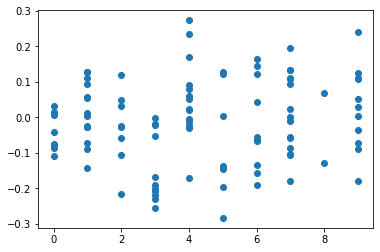

In [7]:
y_preds = []
for x, y in zip(x_test[0:100], y_test[0:100]):
    predicted_y = model.predict(np.array([x]))[0][0]
    y_preds.append(predicted_y)
plt.scatter(y_test[0:100], y_preds)

In [8]:
print("正解：予測")
predicted_y = model.predict(np.array([x_test[0]]))[0][0]
print("{}:{}".format(y_test[0],predicted_y))
predicted_y = model.predict(np.array([x_test[2]]))[0][0]
print("{}:{}".format(y_test[2],predicted_y))

正解：予測
7:0.02251027710735798
1:0.057166099548339844


In [9]:
# 学習
history = model.fit(x_train, y_train,
                    batch_size=32, epochs=100,
                    verbose=1, validation_split=0.2)

Epoch 1/100
1500/1500 [==============================] - 7s 4ms/step - loss: 1.6423 - val_loss: 1.2996
Epoch 2/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7105 - val_loss: 0.5468
Epoch 3/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4924 - val_loss: 0.4959
Epoch 4/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3803 - val_loss: 0.4978
Epoch 5/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3083 - val_loss: 0.5170
Epoch 6/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2539 - val_loss: 0.4706
Epoch 7/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2178 - val_loss: 0.3940
Epoch 8/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1857 - val_loss: 0.3742
Epoch 9/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1638 - val_loss: 0.4046
Epoch 10/100
1500/1500 [==============================] - 6s 4ms/step - l

In [10]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4983


0.49825921654701233

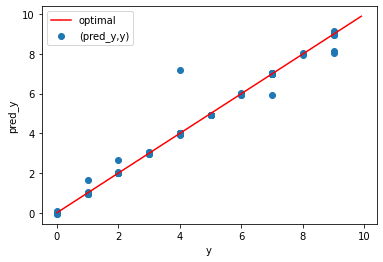

In [11]:
x = np.arange(0, 10, 0.1)
plt.plot(x,x, label="optimal", color="red")

y_preds = []
for x, y in zip(x_test[0:100], y_test[0:100]):
    predicted_y = model.predict(np.array([x]))[0][0]
    y_preds.append(predicted_y)
plt.scatter(y_test[0:100], y_preds, label="(pred_y,y)")
plt.xlabel("y")
plt.ylabel("pred_y")
plt.legend()

In [12]:
print("正解：予測")
predicted_y = model.predict(np.array([x_test[0]]))[0][0]
print("{}:{}".format(y_test[0],predicted_y))
predicted_y = model.predict(np.array([x_test[2]]))[0][0]
print("{}:{}".format(y_test[2],predicted_y))

正解：予測
7:6.999960899353027
1:0.9701278209686279
